In [1]:
# Import libraries
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()

# Download the USE module
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/3" 
embed = hub.Module(module_url,trainable=True)   


In [2]:
print(tf.__version__)
print(hub.__version__)

1.15.0
0.7.0


# Sentences

In [3]:
# Define the documents
# Define the documents
doc_trump = "Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin"

doc_election = "President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election"

doc_putin = "Post elections, Vladimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career"

doc_soup = "Soup is a primarily liquid food, generally served warm or hot (but may be cool or cold), that is made by combining ingredients of meat or vegetables with stock, juice, water, or another liquid. "

doc_noodles = "Noodles are a staple food in many cultures. They are made from unleavened dough which is stretched, extruded, or rolled flat and cut into one of a variety of shapes."

doc_dosa = "Dosa is a type of pancake from the Indian subcontinent, made from a fermented batter. It is somewhat similar to a crepe in appearance. Its main ingredients are rice and black gram."

documents = [doc_trump, doc_election, doc_putin, doc_soup, doc_noodles, doc_dosa]

# Make USE Embedding

In [4]:
# Generate the embedding and print out some descriptive data
def generate_embedding(messages):
    with tf.Session() as session:
        session.run([tf.global_variables_initializer(), tf.tables_initializer()])
        message_embeddings = session.run(embed(messages))
        for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
            #print("Message: {}".format(messages[i]))
            #print("Embedding size: {}".format(len(message_embedding)))
            message_embedding_snippet = ", ".join(
                (str(x) for x in message_embedding[:3]))
            #print("Embedding: [{}, ...]\n".format(message_embedding_snippet))
    return(message_embeddings[0])

In [5]:
%%time
use_embeddings=[]
# print (len(documents))
for i in range(len(documents)):
    print (i)
    use_embeddings.append(generate_embedding([documents[i]]))
    

0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


1
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


3
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


4
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


5
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


CPU times: user 24.2 s, sys: 4.67 s, total: 28.9 s
Wall time: 22.4 s


# Cosine Similarity Matrix`

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(use_embeddings, use_embeddings))

[[ 0.9999998   0.79677564  0.73947716  0.16078237  0.15334758  0.05250767]
 [ 0.79677564  1.          0.7402801   0.1338835   0.05169106 -0.00248851]
 [ 0.73947716  0.7402801   0.99999994  0.10364951  0.04203523  0.07731843]
 [ 0.16078237  0.1338835   0.10364951  0.9999999   0.69906914  0.5549537 ]
 [ 0.15334758  0.05169106  0.04203523  0.69906914  1.0000001   0.7059698 ]
 [ 0.05250767 -0.00248851  0.07731843  0.5549537   0.7059698   1.0000001 ]]


In [7]:
emb = generate_embedding(["How can I reset my password"])


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


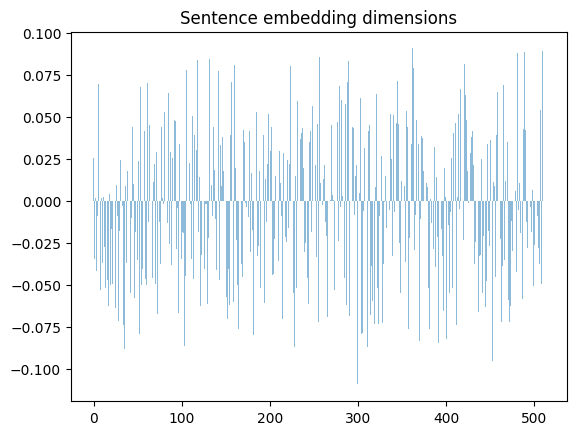

In [8]:
# visualize it in a barchart to show the range of values in the 512 dimensions
y_pos = np.arange(len(emb)) 
plt.bar(y_pos, emb, align='center', alpha=0.5)
plt.title('Sentence embedding dimensions')
plt.show()

# ELMO Embedding

In [9]:
elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)

# Make ELMo Vector

In [10]:
def elmo_vectors(x):
   
  embeddings=elmo(x, signature="default", as_dict=True)["elmo"]
  
  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # return average of ELMo features
    return sess.run(tf.reduce_mean(embeddings,1))

# Make Similarity Matrix

In [11]:
%%time
elmo_embeddings=[]
# print (len(documents))
for i in range(len(documents)):
    print (i)
    elmo_embeddings.append(elmo_vectors([documents[i]])[0])
    


0
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


1
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


2
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


3
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


4
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


5
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


CPU times: user 53.3 s, sys: 6.64 s, total: 59.9 s
Wall time: 47.4 s


In [12]:
print(cosine_similarity(elmo_embeddings, elmo_embeddings))

[[1.0000002  0.695821   0.6137108  0.2556046  0.24022049 0.3043317 ]
 [0.695821   1.0000001  0.71479017 0.2923346  0.2731227  0.32659918]
 [0.6137108  0.71479017 0.9999999  0.21788765 0.24702758 0.22786397]
 [0.2556046  0.2923346  0.21788765 1.0000002  0.78748083 0.7309866 ]
 [0.24022049 0.2731227  0.24702758 0.78748083 0.9999999  0.77231055]
 [0.3043317  0.32659918 0.22786397 0.7309866  0.77231055 0.99999994]]
